# PAA - Ordenação

In [7]:
%pip install -r requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Criação dos valores a serem ordenados

In [9]:
qtd_values = [20_000, 40_000, 60_000]
dados = {
  'Ordem_crescente': [np.arange(1, qtd + 1) for qtd in qtd_values],
  'Ordem_decrescente': [np.arange(qtd, 0, -1) for qtd in qtd_values],
  'Ordem_aleatoria_pemutation': [np.random.permutation(qtd) for qtd in qtd_values]
}

### amostragem


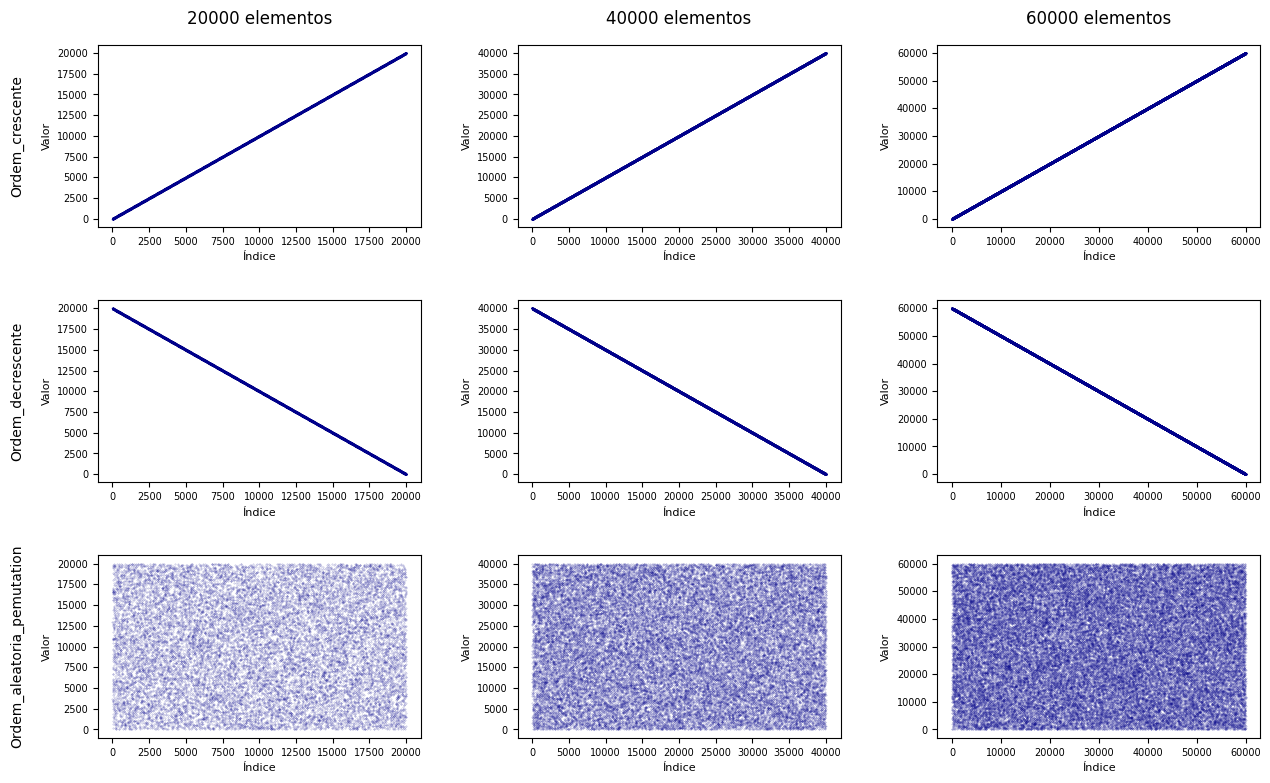

In [10]:
def show_amostragem(qtd_values, dados):
    n_rows = len(dados)  # Número de linhas = número de tipos de ordem
    n_cols = len(qtd_values)  # Número de colunas = número de tamanhos de dados
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5*n_cols, 3*n_rows))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    # Títulos das colunas (quantidades)
    for ax, qtd in zip(axs[0] if n_rows > 1 else [axs], qtd_values):
        ax.set_title(f'{qtd} elementos', pad=15)

    # Plotar cada subgráfico
    for row_idx, (ordem, valores) in enumerate(dados.items()):
        for col_idx, arr in enumerate(valores):
            ax = axs[row_idx, col_idx] if n_rows > 1 else axs[col_idx]
            x = np.arange(len(arr))
            ax.scatter(x, arr, s=0.1, alpha=0.3, color='darkblue')
            ax.set_xlabel('Índice', fontsize=8)
            ax.set_ylabel('Valor', fontsize=8)
            ax.tick_params(axis='both', labelsize=7)

        # Rótulo do tipo de ordem
        axs[row_idx, 0].annotate(
            ordem,
            xy=(-0.25 if n_cols <=3 else -0.35, 0.5),  # Ajuste automático de posição
            xycoords='axes fraction',
            rotation=90,
            fontsize=10,
            ha='center',
            va='center'
        )

    plt.show()
    
# Exibir amostras
show_amostragem(qtd_values, dados)

# Salvando amostragem em txt

In [ ]:
paths = []
for title, values in dados.items():
    for i, value in enumerate(values):
        path = f'files/{title}/{len(value)}.csv'
        paths.append(path)
        
        os.makedirs(os.path.dirname(path), exist_ok=True)
        
        df = pd.DataFrame(value)
        df.to_csv(path, index=False, header=False)
        
print(f'Arquivos salvos em {os.path.abspath("files")}')

['files/Ordem_crescente/20000.csv', 'files/Ordem_crescente/40000.csv', 'files/Ordem_crescente/60000.csv', 'files/Ordem_decrescente/20000.csv', 'files/Ordem_decrescente/40000.csv', 'files/Ordem_decrescente/60000.csv', 'files/Ordem_aleatoria_pemutation/20000.csv', 'files/Ordem_aleatoria_pemutation/40000.csv', 'files/Ordem_aleatoria_pemutation/60000.csv']


## Block Sorting

O tipo de bloco é um algoritmo de classificação que classifica um array dividindo-o em blocos de tamanho fixo, classificando cada bloco individualmente e, em seguida, mesclando os blocos classificados de volta em uma única matriz ordenada. O Block sort é uma boa opção para classificar grandes conjuntos de dados que não cabem na memória. Ele pode classificar eficientemente os dados em blocos que se encaixam na memória e, em seguida, mesclar os blocos classificados juntos para obter a matriz ordenada final.



In [16]:
%%capture results_block_sort
args = "BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0"
results = {}

for path in paths:
    args_copy = args + f" FILE_PATH={path} SIZE_ARR={path.split('/')[-1].split('.')[0]}"
    !make -B block_sort {args_copy}

In [17]:
print(results_block_sort)

files/Ordem_crescente/20000.csv 0.091071
files/Ordem_crescente/40000.csv 0.359588
files/Ordem_crescente/60000.csv 0.805082
files/Ordem_decrescente/20000.csv 0.125498
files/Ordem_decrescente/40000.csv 0.475486
files/Ordem_decrescente/60000.csv 1.068126
files/Ordem_aleatoria_pemutation/20000.csv 0.124682
files/Ordem_aleatoria_pemutation/40000.csv 0.605756
files/Ordem_aleatoria_pemutation/60000.csv 1.497599



In [39]:
data_processing = {}

for line in str(results_block_sort.stdout).splitlines():
  type_ = line.split('/')[1]
  temp = line.split(' ')[-1]
  if not data_processing.get(type_):
    data_processing[type_] = [temp]
  else:
    data_processing[type_].append(temp)

data_processing

{'Ordem_crescente': ['0.091071', '0.359588', '0.805082'],
 'Ordem_decrescente': ['0.125498', '0.475486', '1.068126'],
 'Ordem_aleatoria_pemutation': ['0.124682', '0.605756', '1.497599']}